In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import networkx as nx

In [110]:
sbj='007'
rec='03'
edf_loc= '/media/biraj/DATA/Motor Imagery Dataset/S'+sbj+'/S'+sbj+'R'+rec+'.edf'
Data = mne.io.read_raw_edf(edf_loc, preload = True)
events, event_id=mne.events_from_annotations(Data)
epochs=mne.Epochs(Data, events, event_id, tmin=0, tmax=4, baseline=(None,None))

Extracting EDF parameters from /media/biraj/DATA/Motor Imagery Dataset/S007/S007R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
30 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [111]:
montage = mne.channels.make_standard_montage('standard_1020')
Data.rename_channels(lambda x: x.strip('.'))

<RawEDF | S007R03.edf, 64 x 20000 (125.0 s), ~9.9 MB, data loaded>

In [112]:
ch_map = {'Fc5': 'FC5',
          'Fc3': 'FC3',
          'Fc1': 'FC1',
          'Fcz': 'FCz',
          'Fc2': 'FC2',
          'Fc4': 'FC4',
          'Fc6': 'FC6',
          'Cp5': 'CP5',
          'Cp3': 'CP3',
          'Cp1': 'CP1',
          'Cpz': 'CPz',
          'Cp2': 'CP2',
          'Cp4': 'CP4',
          'Cp6': 'CP6',
          'Af7': 'AF7',
          'Af3': 'AF3',
          'Afz': 'AFz',
          'Af4': 'AF4',
          'Af8': 'AF8',
          'Ft7': 'FT7',
          'Ft8': 'FT8',
          'Tp7': 'TP7',
          'Tp8': 'TP8',
          'Po7': 'PO7',
          'Po3': 'PO3',
          'Poz': 'POz',
          'Po4': 'PO4',
          'Po8': 'PO8'}

In [113]:
Data.rename_channels(ch_map)

<RawEDF | S007R03.edf, 64 x 20000 (125.0 s), ~9.9 MB, data loaded>

In [114]:
Data.set_montage(montage)

<RawEDF | S007R03.edf, 64 x 20000 (125.0 s), ~9.9 MB, data loaded>

#include ={'Fp1','Fpz', 'Fp2','FC1','FCz','FC2','C1','Cz','C2','CP1','CPz','CP2'}
include ={'Fp1', 'Fp2','AF3','AF4','AF7','AF8',
          'FC1','FC2','FC3','FC4','FC5','FC6',
          'C1','C2','C3','C4','C5','C6',
          'CP1','CP2','CP3','CP4','CP5','CP6'}

picks=mne.pick_channels(Data.ch_names, include, ordered=True)

Data.plot_psd();
Data.plot();

In [115]:
csd = mne.preprocessing.compute_current_source_density(Data,lambda2 = 1e-04, stiffness = 3)
Data=csd

Fitted sphere radius:         91.6 mm
Origin head coordinates:      1.0 7.1 49.3 mm
Origin device coordinates:    1.0 7.1 49.3 mm


In [116]:
events, event_id=mne.events_from_annotations(Data)

epochs=mne.Epochs(Data, events, event_id=event_id, tmin=0, tmax=4, baseline=(None,None))

Used Annotations descriptions: ['T0', 'T1', 'T2']
30 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [117]:
epochs.info

<Info | 9 non-empty values
 bads: []
 ch_names: FC5, FC3, FC1, FCz, FC2, FC4, FC6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 CSD
 custom_ref_applied: True
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>

In [118]:
T1=epochs['T1'].get_data()
T2=epochs['T2'].get_data()

Loading data for 7 events and 641 original time points ...
0 bad epochs dropped
Loading data for 8 events and 641 original time points ...
0 bad epochs dropped


Data.plot_sensors(ch_type='eeg');

Data.plot_sensors('3d')

epochs_params = dict(events=events, event_id=event_id, tmin=0, tmax=120)

eeg_ref=mne.Epochs(Data, **epochs_params, baseline=(None, None)).average()

eeg_ref.plot_topomap(times=np.linspace(1,120,10), size=3., title='Topo_plot', time_unit='s');

plt.plot(T1[1][1])


In [119]:
info = Data.info
fmin=4
fmax=8
how_many=8

In [120]:

for i in range(3):
    if i==0:
        continue
        
    T=epochs['T'+str(i)]
    print(T)
    plv, freqs, times, n_epochs, n_tapers=mne.connectivity.spectral_connectivity(T,method='ciplv', indices=None, mode='cwt_morlet', sfreq=info['sfreq'], fmin=fmin, fmax=fmax, faverage=True, cwt_freqs=np.linspace(fmin,fmax,how_many), cwt_n_cycles=1, n_jobs=1)
    if i==1:
        plv_T1=plv
    if i==2:
        plv_T2=plv
    

<Epochs  |   7 events (good & bad), 0 - 4 sec, baseline [None, None], ~178 kB, data not loaded,
 'T1': 7>
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 2016 connections
    using t=0.000s..4.000s for estimation (641 points)
    frequencies: 4.0Hz..8.0Hz (8 points)
    connectivity scores will be averaged for each band
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: ciPLV
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity for epoch 6
    computing connectivity for epoch 7
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
<Epochs  |   8 events (good & bad), 0 - 4 sec, baseline [None, None], ~178 kB, data not loaded,
 'T2': 8>
Connectivity comp

In [121]:
plv_T1 = np.squeeze(plv_T1)

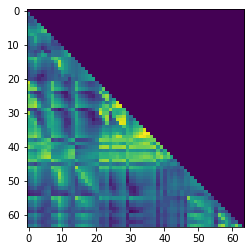

In [123]:
plt.imshow(plv_T1[:,:,60])

In [124]:
from scipy.sparse.linalg.eigen.arpack import eigsh as largest_eigsh

In [125]:
evc_IT1 = np.zeros((64,641))

In [126]:
for i in range(1,641):
    a,b= largest_eigsh(plv_T1[:,:,i],k=1, which = 'LM')
    #print(np.squeeze(b).shape)
    evc_IT1[:,i] = np.squeeze(b);

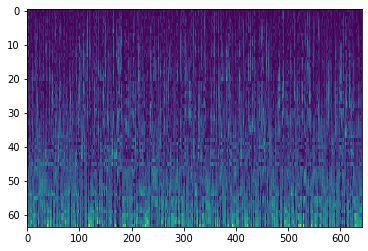

In [127]:
plt.imshow(np.absolute(evc_IT1), aspect = 'auto')

In [96]:
G_T1=nx.Graph()
G=G_T1

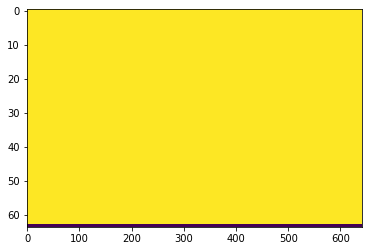

In [97]:
#t=5*160
centrality=[]
for t in range(len(plv_T1[1,1,0,:])):
    min_plv=0
    max_plv=1
    adj=plv_T1[:,:,0,t]
    G.clear()
    G.add_nodes_from(epochs.ch_names)
    pos=nx.circular_layout(G)
    for i in range(len(epochs.ch_names)-1):
        for j in range(i):
            if (adj[i,j]<=min_plv or adj[i,j]>=max_plv):
                continue
            w_edges= [(epochs.ch_names[i],epochs.ch_names[j],1-adj[i,j])]
            G.add_weighted_edges_from(w_edges)
    
    H=nx.minimum_spanning_tree(G, weight=1)
    centrality.append(nx.eigenvector_centrality(G).values())
    
lst_T1=[]
for t in centrality:
    lst_T1.append(list(t))

plt.imshow(np.transpose(lst_T1), aspect='auto')

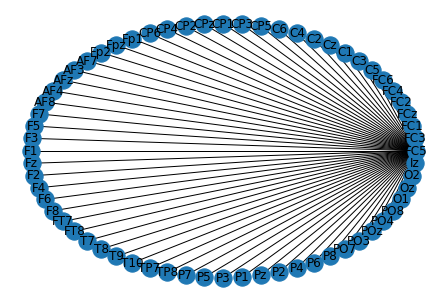

In [98]:
H=nx.minimum_spanning_tree(G, weight=1)
nx.draw(H,pos, with_labels=True)
centrality=nx.eigenvector_centrality(G).values()
#plt.plot(list(centrality))

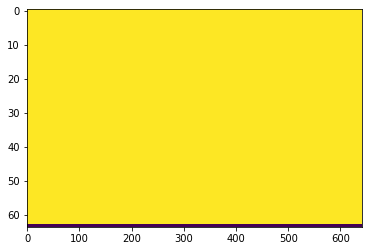

In [99]:
#t=5*160
centrality=[]
for t in range(len(plv_T2[1,1,0,:])):
    min_plv=0
    max_plv=0.55
    adj=plv_T2[:,:,0,t]
    G.clear()
    G.add_nodes_from(epochs.ch_names)
    pos=nx.circular_layout(G)
    for i in range(len(epochs.ch_names)-1):
        for j in range(i):
            if (adj[i,j]<=min_plv or adj[i,j]>=max_plv):
                continue
            w_edges= [(epochs.ch_names[i],epochs.ch_names[j],1-adj[i,j])]
            G.add_weighted_edges_from(w_edges)
            
    H=nx.minimum_spanning_tree(G, weight=1)
    centrality.append(nx.eigenvector_centrality(G).values())
    
lst_T2=[]
for t in centrality:
    lst_T2.append(list(t))
    
plt.imshow(np.transpose(lst_T1), aspect='auto')


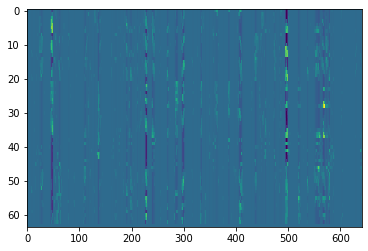

In [100]:
plt.imshow(np.transpose(np.array(lst_T1)-np.array(lst_T2)), aspect='auto')

#### computing minimum spanning tree ###Use graph H as minimum spanning tree
H=nx.minimum_spanning_tree(G, weight=1)
print(sorted(H.edges(data=True)))
nx.draw(H,pos, with_labels=True)

for values in G.nodes:
    evc.append(centrality[values])


H=nx.minimum_spanning_tree(G, weight=1)
print(sorted(H.edges(data=True)))
nx.draw(H,pos, with_labels=True)

pos=nx.spring_layout(G)
plt.figure(figsize=(100,100))
nx.draw_networkx_edges(G,pos,alpha=0.3,width=3, edge_color='m')
nodesize=10
nx.draw_networkx_nodes(G,pos,node_size=nodesize,node_color='w',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
nx.draw_networkx_labels(G,pos,fontsize=14)